In [24]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import statistics
import seaborn as sns


In [17]:
com = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Comments_CSV\\privacy_comments.csv")
sub = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Submissions_CSV\\privacy_submissions.csv")

data = pd.concat([sub, com])
data['Date'] = pd.to_datetime(data['Date'])

data["day-month-yr"]= 0 
data["day-month-yr"] = data["Date"].dt.to_period("D")

data.to_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Sub_and_Com_CSV\\privacy.csv")


data = pd.concat([sub, com])
data = data[data.Username != '[deleted]' ]

data["Number of Posts by User"] = 0
data["Posts Per Thread"] = 0
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
new_df = new_df.sort_values(by='Number of Posts by User', ascending=False)
average_numeber_posts_per_active_user = new_df['Number of Posts by User'].mean()
print("The average number of posts for active users is: " + str(average_numeber_posts_per_active_user)+ "\n")
number_of_users_posting = len(new_df)
new_df = new_df[new_df.Username != '[deleted]' ]
top_ten_users = new_df.head(10)
display(top_ten_users)

new_df = data.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()
new_df = new_df.sort_values(by='Posts Per Thread', ascending=False)

top_ten_threads = new_df.head(10)
display(top_ten_threads)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date', ascending=False)
display(data)


The average number of posts for active users is: 7.018655909100427



,Username,Number of Posts by User
135451,trai_dep,7397
115777,ourari,4785
105644,lo________________ol,3450
2971,86rd9t7ofy8pguh,3236
47200,ProgressiveArchitect,2746
35258,LizMcIntyre,2690
74884,billdietrich1,2491
106356,lugh,2450
106890,madaidan,2356
7357,AutoModerator,1933


,Post ID,Posts Per Thread
65272,9z1205,966
109231,i1lets,788
21508,3l4apg,784
93810,epblc8,628
87939,dn09g8,610
7266,1r5eng,610
42332,6nm0r8,608
63298,9phixm,584
93280,em8doj,569
24195,3yinij,551


,Unnamed: 0,Post ID,Comment ID,Username,Body,Subreddit,Date,Score,Embedded URL,URL,Number of Posts by User,Posts Per Thread
183392,183392.0,1000yi1,1000yi1,onionTool,Is there a reliable alternative that allows yo...,privacy,2022-12-31 10:55:13,7,https://www.reddit.com/r/privacy/comments/1000...,https://www.reddit.com//r/privacy/comments/100...,0,0
183390,183390.0,zzzjz1,zzzjz1,WickedWizard3588,"Hey,\n\nSo for the past few months, I've been ...",privacy,2022-12-31 09:50:24,1,https://www.reddit.com/r/privacy/comments/zzzj...,https://www.reddit.com//r/privacy/comments/zzz...,0,0
183389,183389.0,zzyz6z,zzyz6z,nuttimoff,[removed],privacy,2022-12-31 09:23:44,1,https://www.reddit.com/r/privacy/comments/zzyz...,https://www.reddit.com//r/privacy/comments/zzy...,0,0
183388,183388.0,zzyo8i,zzyo8i,Crossiezy,I’ve already switched most of my accounts. But...,privacy,2022-12-31 09:09:50,10,https://www.reddit.com/r/privacy/comments/zzyo...,https://www.reddit.com//r/privacy/comments/zzy...,0,0
183387,183387.0,zzygvz,zzygvz,x-hacka_56,[removed],privacy,2022-12-31 09:00:21,1,https://www.reddit.com/r/privacy/comments/zzyg...,https://www.reddit.com//r/privacy/comments/zzy...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,6.0,6eujs,6eujs,Escafane,NaN,privacy,2008-04-07 02:54:35,2,http://www.lightbluetouchpaper.org/2008/04/04/...,https://www.reddit.com//r/privacy/comments/6eu...,0,0
5,5.0,6e1wx,6e1wx,Escafane,NaN,privacy,2008-03-31 10:17:01,2,http://www.dailygalaxy.com/my_weblog/2007/10/c...,https://www.reddit.com//r/privacy/comments/6e1...,0,0
4,4.0,6cxeb,6cxeb,Escafane,NaN,privacy,2008-03-21 10:26:46,2,http://cryptogon.com/?p=877,https://www.reddit.com//r/privacy/comments/6cx...,0,0
3,3.0,6cw65,6cw65,Escafane,NaN,privacy,2008-03-21 05:01:37,2,http://reddit.com/info/1hoyr/comments/c1hswq,https://www.reddit.com//r/privacy/comments/6cw...,0,0


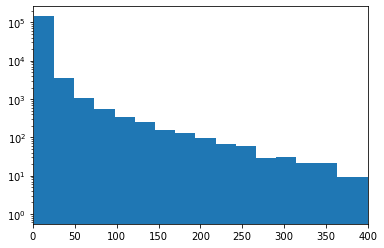

In [12]:
#CCDF of user posting frequency:X-axis: number of posts Y-axis: Percentage of users posting this many posts


users_posts ={}
for i, row in data.iterrows():
    if row["Post ID"] not in users_posts:
        users_posts[row["Post ID"]] = 1 
    else: 
        users_posts[row["Post ID"]] += 1
        
x = []
for key, val in users_posts.items():
    x.append(val)
plt.hist(x, 40)
plt.xlim(0,400)
plt.yscale('log')
plt.show()
    

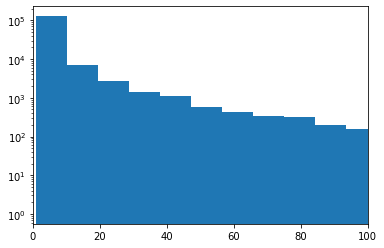

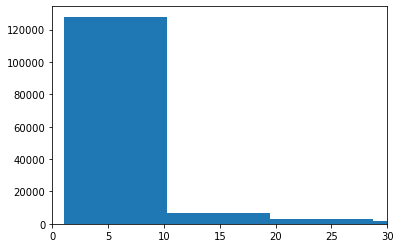

In [13]:
users_posts ={}
for i, row in data.iterrows():
    if row["Username"] not in users_posts:
        users_posts[row["Username"]] = 1 
    else: 
        users_posts[row.Username] += 1
        
x = []
for key, val in users_posts.items():
    x.append(val)
plt.hist(x, 800)
plt.xlim(0,100)
plt.yscale('log')
plt.show()

users_posts ={}

for i, row in data.iterrows():
    if row["Username"] not in users_posts:
        users_posts[row["Username"]] = 1 
    else: 
        users_posts[row.Username] += 1
        
x = []
for key, val in users_posts.items():
    x.append(val)
plt.hist(x, 800)
plt.xlim(0,30)

plt.show()
    
    

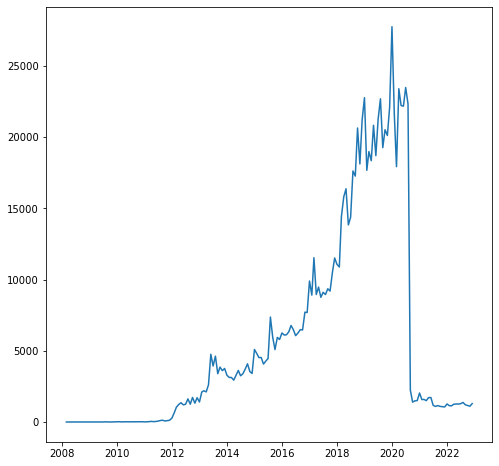

In [18]:
date_dict = {}
new_data = data 
new_data["mnth-yr"] = 0

new_data["mnth-yr"] = data["Date"].dt.to_period("M")


for i, row in new_data.iterrows():
    if row["mnth-yr"] not in date_dict:
        date_dict[row["mnth-yr"]]= 1 
    else: 
        date_dict[row["mnth-yr"]] += 1
        
x, y = [], []
for key, val in date_dict.items():
    x.append(pd.to_datetime((str(key.year) + "-" + str(key.month))))
    y.append(val)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y);

    

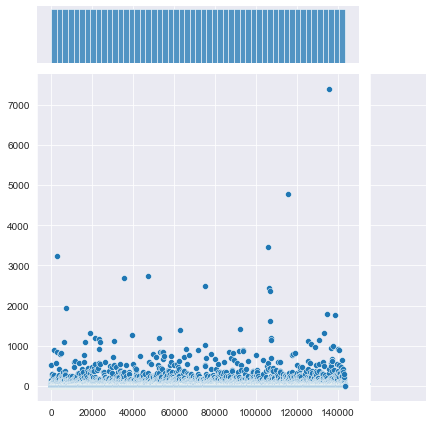

In [22]:
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
col_1 = np.array(new_df['Number of Posts by User'])
col_3 = np.array(range(0, len(new_df['Number of Posts by User'])))

sns.jointplot(x=col_3, y=col_1)

,Post ID,Number of Unique Users
0,1.06E+85,3
1,1.75E+03,6
2,1000yi1,1
3,100bii,6
4,100hi9,2
...,...,...
151464,zzyevm,1
151465,zzygvz,1
151466,zzyo8i,1
151467,zzyz6z,1


,Number of Unique Users,Number of Threads with Unique users
0,1,75478
1,2,19899
2,3,13256
3,4,9848
4,5,7155
...,...,...
220,328,1
221,329,1
222,379,1
223,521,1


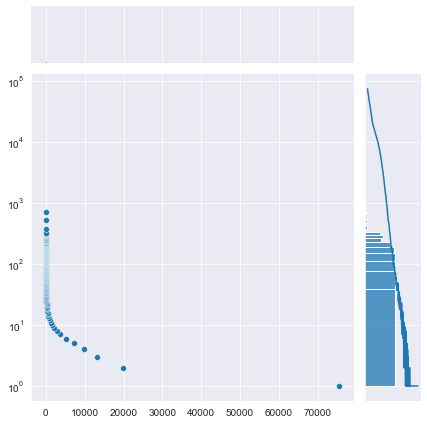

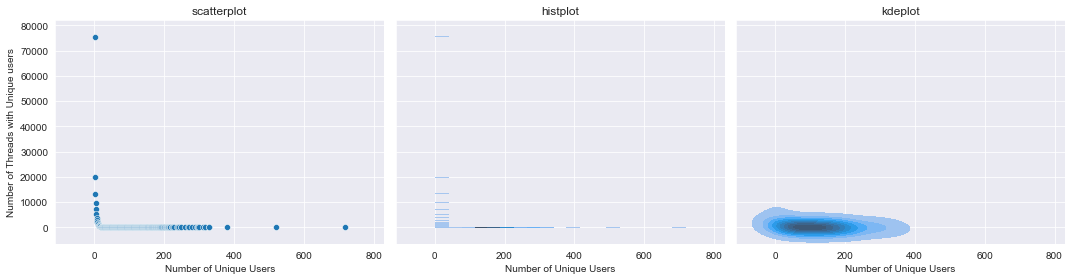

In [23]:
#X-axis: Unique users interacting in a thread, y-axis: # of threads that have this (histogram)
data['Number of Unique Users'] = 0
posts_per_thread = data.groupby(['Post ID','Username'])['Number of Unique Users'].agg('unique').reset_index()
posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()
#posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()




#posts_per_thread = posts_per_thread.sort_values(by='Number of Unique Users', ascending=True)

 
display(posts_per_thread)

#isplay(posts_per_thread.head(20))
data_dict = {}
posts_per_thread["Number of Threads with Unique users"]  = 0 
new_df = posts_per_thread.groupby(['Number of Unique Users'])['Number of Threads with Unique users'].agg('count').reset_index()
display(new_df)

new_df = new_df.astype({'Number of Threads with Unique users':'int'})
new_df = new_df.astype({'Number of Unique Users':'int'})
new_df = new_df.astype({'Number of Threads with Unique users':'int'})

col_1 = np.array(new_df["Number of Unique Users"])
col_3 = np.array(new_df['Number of Threads with Unique users'] ) 
sns.jointplot(x=col_3, y=col_1)


plt.loglog(col_1,col_3)
plt.show()

#plt.xscale('log')
#plt.yscale('log')                      

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

sns.set_style('darkgrid')
sns.scatterplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax1)
sns.histplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax2)
sns.kdeplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], fill=True, ax=ax3)

ax1.set_title('scatterplot')
ax2.set_title('histplot')
ax3.set_title('kdeplot')
plt.tight_layout()
plt.show()

    